<a href="https://colab.research.google.com/github/RogerHeederer/ML_practice_MyFirstML_B/blob/master/Basketball_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

source reference : https://github.com/wikibook/machine-learnin

**위 레퍼런스를 참조하여 공부하였으며, 필요하다고 생각되는 부분에 추가적인 설명 ,코드 추가, 그림 삽입 등을 덧붙였습니다.**


**서포트 벡터 : 결정 경계선(Decesion boundary)와 가장 가까이 맞닿은데이터의 포인트**

**결정 경계 = N-1차원**


In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
np.random.seed(5)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
train = pd.read_csv("https://raw.githubusercontent.com/wikibook/machine-learning/2.0/data/csv/basketball_train.csv")
test = pd.read_csv("https://raw.githubusercontent.com/wikibook/machine-learning/2.0/data/csv/basketball_test.csv")

In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

import numpy as np

In [5]:
def svc_param_selection(X, y, nfolds):
  svm_parameters = [
                    {
                        'kernel': ['rbf'],
                        'gamma': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1],
                        'C': [0.01, 0.1, 1, 10, 100, 1000]
                    }]
  clf = GridSearchCV(SVC(), svm_parameters, cv=10)
  clf.fit(X_train, y_train.values.ravel())
  print(clf.best_params_)

  return clf

 #SVM의 파라미터는 2가지가 있음. C는 코스트. 결정경계선의 마진을 결정하는 파라미터
 # gamma는 커널 데이터 포인트의 표준편차를 결정하는 파라미터

In [6]:
X_train = train[['3P', 'BLK']]
y_train = train[['Pos']]

clf = svc_param_selection(X_train, y_train.values.ravel(), 10)

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}


In [7]:
y_train

,Pos
0,SG
1,SG
2,SG
3,SG
4,C
...,...
75,SG
76,C
77,C
78,SG


In [8]:
y_train.values.ravel()

array(['SG', 'SG', 'SG', 'SG', 'C', 'SG', 'C', 'C', 'SG', 'C', 'SG', 'SG',
       'SG', 'SG', 'C', 'C', 'SG', 'C', 'SG', 'C', 'C', 'C', 'C', 'SG',
       'C', 'SG', 'C', 'C', 'C', 'C', 'C', 'SG', 'C', 'SG', 'SG', 'SG',
       'SG', 'SG', 'SG', 'SG', 'SG', 'C', 'SG', 'C', 'C', 'SG', 'C', 'SG',
       'SG', 'SG', 'SG', 'SG', 'SG', 'C', 'C', 'SG', 'C', 'C', 'C', 'SG',
       'SG', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'SG', 'SG', 'SG', 'C',
       'C', 'C', 'SG', 'SG', 'C', 'C', 'SG', 'SG'], dtype=object)

In [9]:
# 시각화를 하기 위해, 최적의 C와 최적의 C를 비교하기 위한 다른 C를 후보로 저장합니다.
C_canditates = []
C_canditates.append(clf.best_params_['C'] * 0.01)
C_canditates.append(clf.best_params_['C'])
C_canditates.append(clf.best_params_['C'] * 100)

# 시각화를 하기 위해, 최적의 gamma와 최적의 gamma를 비교하기 위한 다른 gamma를 후보로 저장합니다.
gamma_candidates = []
gamma_candidates.append(clf.best_params_['gamma'] * 0.01)
gamma_candidates.append(clf.best_params_['gamma'])
gamma_candidates.append(clf.best_params_['gamma'] * 100)

In [10]:
C_canditates

[0.001, 0.1, 10.0]

In [11]:
gamma_candidates

[0.01, 1, 100]

In [12]:
X = train[['3P', 'BLK']]
Y = train['Pos'].tolist()

In [14]:
Y[1:10]

['SG', 'SG', 'SG', 'C', 'SG', 'C', 'C', 'SG', 'C']

In [15]:
#포지션에 해당하는 문자열들을 백터화 표현
position = []
for gt in Y:
  if gt == 'C':
    position.append(0)
  else:
    position.append(1)

In [17]:
position[1:10]

[1, 1, 1, 0, 1, 0, 0, 1, 0]

In [19]:
# 파라미터 단위로 SVM 모델 생성
classifiers = []
for C in C_canditates:
  for gamma in gamma_candidates:
    clf = SVC(C=C, gamma=gamma)
    clf.fit(X, Y)
    classifiers.append((C, gamma, clf))

In [26]:
classifiers

[(0.001,
  0.01,
  SVC(C=0.001, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
      max_iter=-1, probability=False, random_state=None, shrinking=True,
      tol=0.001, verbose=False)),
 (0.001,
  1,
  SVC(C=0.001, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
      probability=False, random_state=None, shrinking=True, tol=0.001,
      verbose=False)),
 (0.001,
  100,
  SVC(C=0.001, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma=100, kernel='rbf',
      max_iter=-1, probability=False, random_state=None, shrinking=True,
      tol=0.001, verbose=False)),
 (0.1,
  0.01,
  SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
      max_iter=

In [22]:
plt.figure(figsize=(18, 18))
xx, yy = np.meshgrid(np.linspace(0, 4, 100), np.linspace(0, 4, 100))

<Figure size 1296x1296 with 0 Axes>

In [27]:
C, gamma, clf

(10.0,
 100,
 SVC(C=10.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma=100, kernel='rbf',
     max_iter=-1, probability=False, random_state=None, shrinking=True,
     tol=0.001, verbose=False))

In [29]:
xx

array([[0.        , 0.04040404, 0.08080808, ..., 3.91919192, 3.95959596,
        4.        ],
       [0.        , 0.04040404, 0.08080808, ..., 3.91919192, 3.95959596,
        4.        ],
       [0.        , 0.04040404, 0.08080808, ..., 3.91919192, 3.95959596,
        4.        ],
       ...,
       [0.        , 0.04040404, 0.08080808, ..., 3.91919192, 3.95959596,
        4.        ],
       [0.        , 0.04040404, 0.08080808, ..., 3.91919192, 3.95959596,
        4.        ],
       [0.        , 0.04040404, 0.08080808, ..., 3.91919192, 3.95959596,
        4.        ]])

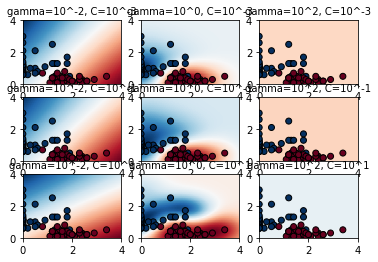

In [30]:
for (k, (C, gamma, clf)) in enumerate(classifiers):
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.subplot(len(C_canditates), len(gamma_candidates), k + 1)
    plt.title("gamma=10^%d, C=10^%d" % (np.log10(gamma), np.log10(C)),
              size='medium')
    
        # 서포트 벡터와 결정경계선을 시각화합니다.
    plt.pcolormesh(xx, yy, -Z, cmap=plt.cm.RdBu)
    plt.scatter(X['3P'], X['BLK'], c=position, cmap=plt.cm.RdBu_r, edgecolors='k')

In [31]:
#테스트 하기

X_test = test[['3P', 'BLK']]

y_test = test[['Pos']]

y_true, y_pred = y_test, clf.predict(X_test)

In [32]:
comparison = pd.DataFrame({'prediction':y_pred, 'ground_truth':y_true.values.ravel()}) 
comparison

,prediction,ground_truth
0,C,C
1,SG,SG
2,C,C
3,SG,SG
4,C,C
5,C,C
6,C,C
7,SG,SG
8,SG,SG
9,C,C


In [33]:
print(classification_report(y_true, y_pred))
print()
print("accuracy : "+ str(accuracy_score(y_true, y_pred)) )

              precision    recall  f1-score   support

           C       1.00      0.91      0.95        11
          SG       0.90      1.00      0.95         9

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.96      0.95      0.95        20


accuracy : 0.95
